<a href="https://colab.research.google.com/github/hananbahtiti/Hybrid-Intrusion-detection-Systems/blob/main/network_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrwellsdavid_unsw_nb15_path = kagglehub.dataset_download('mrwellsdavid/unsw-nb15')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [ ]:
#Create folder
folder_name = '/kaggle/working/dataset'
os.makedirs(folder_name, exist_ok=True)
print(f"The folder has been created: {folder_name}")

# Load the CSV files
df1 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')
df2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

# Concatenate them vertically (stack rows)
df_combined = pd.concat([df1, df2], ignore_index=True)

# Save to a new CSV (optional)
df_combined.to_csv(f'{folder_name}/UNSW_NB15.csv', index=False)


The folder has been created: /kaggle/working/dataset


In [ ]:
df = pd.read_csv('/kaggle/working/dataset/UNSW_NB15.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
df['attack_cat'].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
(df.isna().mean()) * 100

id                   0.0
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sttl                 0.0
dttl                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_srv_src           0.0
ct_state_ttl         0.0
ct_dst_ltm           0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0


In [ ]:
df[df['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


In [ ]:
df = df.replace({'service': '-'}, 'unknown')


In [ ]:
df['service'].value_counts()

service
unknown     141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64

In [ ]:
df['proto'].value_counts()

proto
tcp      123041
udp       92701
unas      15599
arp        3846
ospf       3271
          ...  
argus       131
hmp         131
igmp         48
icmp         15
rtp           1
Name: count, Length: 133, dtype: int64

In [ ]:
df['state'].value_counts()

state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
PAR         1
URN         1
no          1
CLO         1
Name: count, dtype: int64

In [ ]:
#count of unique values in the column attack_cat

df['attack_cat'].value_counts()


attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
##count of unique values in the column label

df['label'].value_counts()

label
1    164673
0     93000
Name: count, dtype: int64

In [ ]:
def data_encoding(file_path, columns: list):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        for column in columns:
            if column in df.columns:
                print(f"\n🔄 Encoding column: '{column}'")

                # Extract unique non-null values with progress bar
                unique_values = df[column].dropna().unique()
                tqdm(unique_values, desc=f"Extracting values from '{column}'")
                print(f"✅ Number of unique values in '{column}': {len(unique_values)}")

                # Fit and transform using LabelEncoder
                encoder = LabelEncoder()
                encoder.fit(unique_values)

                # Replace NaN with empty string temporarily for encoding
                df[column] = df[column].fillna('').astype(str)
                df[column] = encoder.transform(df[column])
            else:
                print(f"❌ Column '{column}' not found in the file.")

        # Save updated DataFrame
        df.to_csv(file_path, index=False)
        print(f"\n✅ Encoding completed for all specified columns in file: {file_path}")
        return "✅ Encoding completed."

    except Exception as e:
        return f"❌ An error occurred: {e}"

In [ ]:
columns_to_encode = ['attack_cat', 'state', 'service', 'proto']
data_encoding(file_path='/kaggle/working/dataset/UNSW_NB15.csv'
              , columns=columns_to_encode)


🔄 Encoding column: 'attack_cat'


Extracting values from 'attack_cat':   0%|          | 0/10 [00:00<?, ?it/s]


✅ Number of unique values in 'attack_cat': 10

🔄 Encoding column: 'state'


Extracting values from 'state':   0%|          | 0/11 [00:00<?, ?it/s]


✅ Number of unique values in 'state': 11

🔄 Encoding column: 'service'


Extracting values from 'service':   0%|          | 0/13 [00:00<?, ?it/s]

✅ Number of unique values in 'service': 13



🔄 Encoding column: 'proto'


Extracting values from 'proto':   0%|          | 0/133 [00:00<?, ?it/s]


✅ Number of unique values in 'proto': 133

✅ Encoding completed for all specified columns in file: /kaggle/working/dataset/UNSW_NB15.csv


'✅ Encoding completed.'

In [ ]:
df = pd.read_csv('/kaggle/working/dataset/UNSW_NB15.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,4,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,4,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,4,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,4,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,4,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

##  **Data Visualization**

In [ ]:
folder_name = '/kaggle/working/plots'
os.makedirs(folder_name, exist_ok=True)
print(f"The folder has been created: {folder_name}")

The folder has been created: /kaggle/working/plots


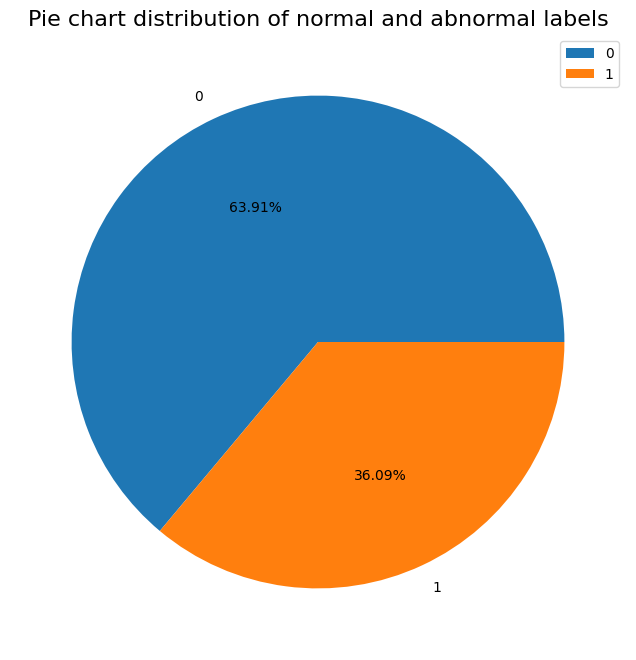

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts(),labels=[0, 1],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('/kaggle/working/plots/Pie_chart_binary.png')
plt.show()

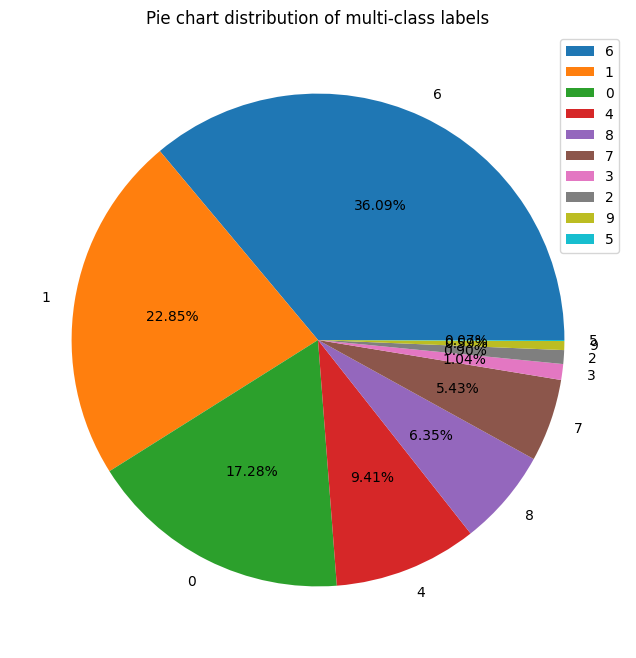

In [ ]:

plt.figure(figsize=(8,8))
plt.pie(df.attack_cat.value_counts(),labels=df.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/Pie_chart_multi.png')
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)

# Correlation Matrix for Binary Labels
plt.figure(figsize=(20, 1))
sns.heatmap(df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Label', fontsize=16)
plt.tight_layout()
plt.savefig('/kaggle/working/plots/correlation_matrix_bin.png')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7afd3d4b1080> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7afd3d56aca0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# حساب مصفوفة الارتباط لجميع الأعمدة الرقمية
corr_matrix = df.corr(numeric_only=True)

# استخراج الارتباط بين جميع الأعمدة وعمود label
corr_with_label = corr_matrix['label'].abs()  # القيم المطلقة فقط

# استخراج الخصائص ذات ارتباط أعلى من 0.3
highest_corr_bin = corr_with_label[corr_with_label > 0.2]

# ترتيب النتائج من الأقل إلى الأعلى
highest_corr_bin = highest_corr_bin.sort_values(ascending=True)

# عرض النتائج
print("🔍 Top correlated features with 'label':")
print(highest_corr_bin)


🔍 Top correlated features with 'label':
ct_dst_ltm          0.240776
ct_srv_src          0.246596
ct_srv_dst          0.247812
ct_src_ltm          0.252498
dtcpb               0.263543
stcpb               0.266585
dmean               0.295173
ct_dst_src_ltm      0.299609
ct_src_dport_ltm    0.318518
rate                0.335883
dwin                0.339166
dload               0.352169
swin                0.364877
ct_dst_sport_ltm    0.371672
state               0.462972
ct_state_ttl        0.476559
id                  0.490584
attack_cat          0.602160
sttl                0.624082
label               1.000000
Name: label, dtype: float64


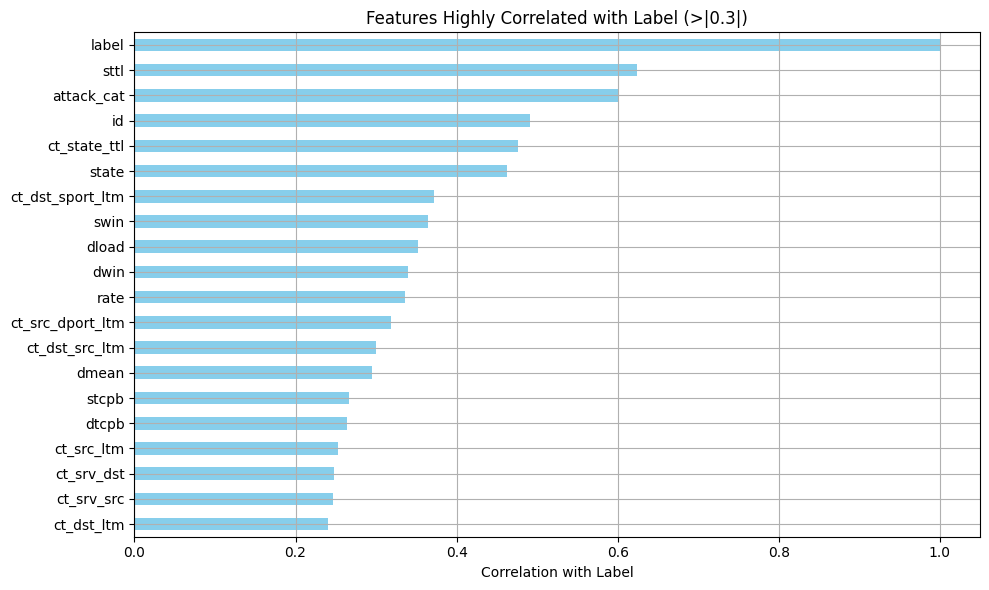

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
highest_corr_bin.plot(kind='barh', color='skyblue')
plt.title("Features Highly Correlated with Label (>|0.3|)")
plt.xlabel("Correlation with Label")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['ct_dst_ltm', 'ct_srv_src', 'ct_srv_dst', 'ct_src_ltm', 'dtcpb',
       'stcpb', 'dmean', 'ct_dst_src_ltm', 'ct_src_dport_ltm', 'rate', 'dwin',
       'dload', 'swin', 'ct_dst_sport_ltm', 'state', 'ct_state_ttl', 'id',
       'attack_cat', 'sttl', 'label'],
      dtype='object')

In [ ]:
# Binary labelled Dataset
bin_data = df[bin_cols].copy()
bin_data

,ct_dst_ltm,ct_srv_src,ct_srv_dst,ct_src_ltm,dtcpb,stcpb,dmean,ct_dst_src_ltm,ct_src_dport_ltm,rate,dwin,dload,swin,ct_dst_sport_ltm,state,ct_state_ttl,id,attack_cat,sttl,label
0,1,1,1,1,2202533631,621772692,43,1,1,74.087490,255,8495.365234,255,1,4,0,1,6,252,0
1,1,43,6,1,3077387971,1417884146,1106,2,1,78.473372,255,503571.312500,255,1,4,1,2,6,62,0
2,2,7,6,2,2963114973,2116150707,824,3,1,14.170161,255,60929.230470,255,1,4,1,3,6,62,0
3,2,1,1,2,1047442890,1107119177,64,3,1,13.677108,255,3358.622070,255,1,4,1,4,6,62,0
4,2,43,39,2,1977154190,2436137549,45,40,2,33.373826,255,3987.059814,255,1,4,1,5,6,254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,2,1,1,2,0,0,0,2,1,200000.005100,0,0.000000,0,1,5,2,82328,6,254,0
257669,2,1,2,3,3284291478,1072535109,44,1,1,24.410067,255,2242.109863,255,1,4,1,82329,6,254,0
257670,1,1,1,1,0,0,0,1,1,0.000000,0,0.000000,0,1,5,2,82330,6,0,0
257671,1,1,1,1,0,0,0,1,1,0.000000,0,0.000000,0,1,5,2,82331,6,0,0


In [ ]:
bin_data.to_csv('/kaggle/working/dataset/bin_data.csv')
bin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ct_dst_ltm        257673 non-null  int64  
 1   ct_srv_src        257673 non-null  int64  
 2   ct_srv_dst        257673 non-null  int64  
 3   ct_src_ltm        257673 non-null  int64  
 4   dtcpb             257673 non-null  int64  
 5   stcpb             257673 non-null  int64  
 6   dmean             257673 non-null  int64  
 7   ct_dst_src_ltm    257673 non-null  int64  
 8   ct_src_dport_ltm  257673 non-null  int64  
 9   rate              257673 non-null  float64
 10  dwin              257673 non-null  int64  
 11  dload             257673 non-null  float64
 12  swin              257673 non-null  int64  
 13  ct_dst_sport_ltm  257673 non-null  int64  
 14  state             257673 non-null  int64  
 15  ct_state_ttl      257673 non-null  int64  
 16  id                25

In [ ]:
bin_data.head()

,ct_dst_ltm,ct_srv_src,ct_srv_dst,ct_src_ltm,dtcpb,stcpb,dmean,ct_dst_src_ltm,ct_src_dport_ltm,rate,dwin,dload,swin,ct_dst_sport_ltm,state,ct_state_ttl,id,attack_cat,sttl,label
0,1,1,1,1,2202533631,621772692,43,1,1,74.087490,255,8495.365234,255,1,4,0,1,6,252,0
1,1,43,6,1,3077387971,1417884146,1106,2,1,78.473372,255,503571.312500,255,1,4,1,2,6,62,0
2,2,7,6,2,2963114973,2116150707,824,3,1,14.170161,255,60929.230470,255,1,4,1,3,6,62,0
3,2,1,1,2,1047442890,1107119177,64,3,1,13.677108,255,3358.622070,255,1,4,1,4,6,62,0
4,2,43,39,2,1977154190,2436137549,45,40,2,33.373826,255,3987.059814,255,1,4,1,5,6,254,0


In [ ]:
folder_name = '/kaggle/working/model'
os.makedirs(folder_name, exist_ok=True)
print(f"The folder has been created: {folder_name}")

The folder has been created: /kaggle/working/model



🔍 Starting GridSearchCV for model: IsolationForest
Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Finished training: IsolationForest
🔧 Best parameters: {'contamination': 0.09, 'max_features': 0.6, 'max_samples': 'auto', 'n_estimators': 40}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.34      0.86      0.49     18613
      Attack       0.42      0.06      0.10     32922

    accuracy                           0.35     51535
   macro avg       0.38      0.46      0.29     51535
weighted avg       0.39      0.35      0.24     51535

📈 AUC: 0.4569
🔍 First 10 predictions: [0 0 0 0 0 0 0 0 0 0]

🔍 Starting GridSearchCV for model: LocalOutlierFactor
Fitting 3 folds for each of 2 candidates, totalling 6 fits

✅ Finished training: LocalOutlierFactor
🔧 Best parameters: {'n_neighbors': 20, 'novelty': True}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.98      0.97     

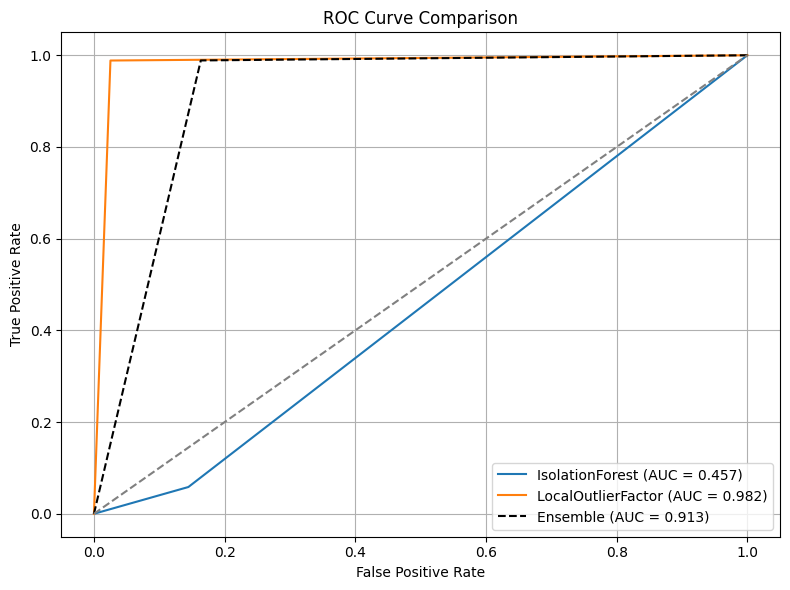

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Custom scorer using F1 score
def custom_f1_score(y_true, y_pred):
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    return f1_score(y_true, y_pred_binary)

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# Load dataset
df = pd.read_csv("/kaggle/working/dataset/bin_data.csv")

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Use only normal data for fitting if needed
X_train_normal = X_train_scaled[y_train == 0]

# Parameter grids
param_grid_if = {
    'n_estimators': [20, 30, 40 ],
    'contamination': [ 0.06, 0.07, 0.08, 0.09],
    'max_samples': ['auto'],
    'max_features': [0.6, 0.7, 0.8]
}

# Define models
models = {
    'IsolationForest': IsolationForest(),
     'LocalOutlierFactor': LocalOutlierFactor(novelty=True)  # Uncomment to test LOF
}

param_grids = {
    'IsolationForest': param_grid_if,
     'LocalOutlierFactor': param_grid_lof
}

best_models = {}
best_params = {}
roc_aucs = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Starting GridSearchCV for model: {name}")

    # Use only normal data if required
    X_fit = X_train_normal if name == 'LocalOutlierFactor' else X_train_scaled

    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        n_jobs=-1,
        verbose=1,
        scoring=custom_scorer
    )

    grid_search.fit(X_fit, y_train if name != 'LocalOutlierFactor' else y_train[y_train == 0])

    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_

    # Predict and evaluate
    y_pred = best_model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)

    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    roc_aucs[name] = roc_auc

    print(f"\n✅ Finished training: {name}")
    print(f"🔧 Best parameters: {grid_search.best_params_}")
    print("📊 Classification report:")
    print(classification_report(y_test, y_pred_binary, target_names=["Normal", "Attack"]))
    print(f"📈 AUC: {roc_auc:.4f}")
    print(f"🔍 First 10 predictions: {y_pred_binary[:10]}")

    # Save model
    os.makedirs('/kaggle/working/model/', exist_ok=True)
    joblib.dump(
        best_model,
        f'/kaggle/working/model/{name}_best.joblib'
    )

# Ensemble voting
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    predictions[name] = y_pred_binary

# Combine votes
ensemble_votes = np.mean(np.array(list(predictions.values())), axis=0)
ensemble_pred = (ensemble_votes >= 0.5).astype(int)

# Evaluate ensemble
print("\n📊 Ensemble Voting Evaluation")
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Normal", "Attack"])
print(ensemble_report)

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
roc_aucs['Ensemble'] = roc_auc
print(f"📈 Ensemble AUC: {roc_auc:.4f}")

# Save classification reports
classification_reports = {
    name: classification_report(y_test, pred, output_dict=True, target_names=["Normal", "Attack"])
    for name, pred in predictions.items()
}
classification_reports['Ensemble'] = classification_report(y_test, ensemble_pred, output_dict=True, target_names=["Normal", "Attack"])

df_reports = pd.DataFrame(classification_reports).transpose()
df_reports.to_csv("/kaggle/working/model/classification_reports_with_gridsearch.csv")

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, y_pred_binary in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot ensemble
fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.3f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/kaggle/working/model/ensemble_roc_comparison_with_gridsearch.png")
plt.show()

# Save AUC and best parameters
results_list = []
for name in best_models:
    result = {"Model": name, "AUC": roc_aucs[name]}
    result.update(best_params[name])
    results_list.append(result)

results_list.append({
    "Model": "Ensemble",
    "AUC": roc_aucs['Ensemble']
})

df_auc_params = pd.DataFrame(results_list)
df_auc_params.to_csv("/kaggle/working/model/auc_and_best_params.csv", index=False)


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Custom scorer using F1 score
def custom_f1_score(y_true, y_pred):
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    return f1_score(y_true, y_pred_binary)

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# Load dataset
df = pd.read_csv("/kaggle/working/dataset/bin_data.csv")

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Use only normal data for fitting if needed
X_train_normal = X_train_scaled[y_train == 0]


# Parameter grids
param_grid_if = {
    'n_estimators': [10, 20, 30, 40 ],
    'contamination': [ 0.06, 0.07, 0.08, 0.09, 0.1],
    'max_samples': ['auto'],
    'max_features': [0.6, 0.7, 0.8]
}

param_grid_svm = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['rbf', 'linear']
}

param_grid_lof = {
    'n_neighbors': [20, 30],
    'novelty': [True]
}

# Define models
models = {
    'IsolationForest': IsolationForest(),
    'LocalOutlierFactor': LocalOutlierFactor(novelty=True),
    'OneClassSVM': OneClassSVM()
}

param_grids = {
    'IsolationForest': param_grid_if,
     'OneClassSVM': param_grid_svm,
     'LocalOutlierFactor': param_grid_lof
}

best_models = {}
best_params = {}
roc_aucs = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Starting GridSearchCV for model: {name}")

    # Use only normal data if required
    X_fit = X_train_normal if name == 'LocalOutlierFactor' else X_train_scaled

    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        n_jobs=-1,
        verbose=1,
        scoring=custom_scorer
    )

    grid_search.fit(X_fit, y_train if name != 'LocalOutlierFactor' else y_train[y_train == 0])

    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_

    # Predict and evaluate
    y_pred = best_model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)

    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    roc_aucs[name] = roc_auc

    print(f"\n✅ Finished training: {name}")
    print(f"🔧 Best parameters: {grid_search.best_params_}")
    print("📊 Classification report:")
    print(classification_report(y_test, y_pred_binary, target_names=["Normal", "Attack"]))
    print(f"📈 AUC: {roc_auc:.4f}")
    print(f"🔍 First 10 predictions: {y_pred_binary[:10]}")

    # Save model
    os.makedirs('/kaggle/working/model/', exist_ok=True)
    joblib.dump(
        best_model,
        f'/kaggle/working/model/{name}_best.joblib'
    )

# Ensemble voting
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    predictions[name] = y_pred_binary

# Combine votes
ensemble_votes = np.mean(np.array(list(predictions.values())), axis=0)
ensemble_pred = (ensemble_votes >= 0.5).astype(int)

# Evaluate ensemble
print("\n📊 Ensemble Voting Evaluation")
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Normal", "Attack"])
print(ensemble_report)

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
roc_aucs['Ensemble'] = roc_auc
print(f"📈 Ensemble AUC: {roc_auc:.4f}")

# Save classification reports
classification_reports = {
    name: classification_report(y_test, pred, output_dict=True, target_names=["Normal", "Attack"])
    for name, pred in predictions.items()
}
classification_reports['Ensemble'] = classification_report(y_test, ensemble_pred, output_dict=True, target_names=["Normal", "Attack"])

df_reports = pd.DataFrame(classification_reports).transpose()
df_reports.to_csv("/kaggle/working/model/classification_reports_with_gridsearch.csv")

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, y_pred_binary in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot ensemble
fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.3f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/kaggle/working/model/ensemble_roc_comparison_with_gridsearch.png")
plt.show()

# Save AUC and best parameters
results_list = []
for name in best_models:
    result = {"Model": name, "AUC": roc_aucs[name]}
    result.update(best_params[name])
    results_list.append(result)

results_list.append({
    "Model": "Ensemble",
    "AUC": roc_aucs['Ensemble']
})

df_auc_params = pd.DataFrame(results_list)
df_auc_params.to_csv("/kaggle/working/model/auc_and_best_params.csv", index=False)



🔍 Starting GridSearchCV for model: IsolationForest
Fitting 3 folds for each of 60 candidates, totalling 180 fits

✅ Finished training: IsolationForest
🔧 Best parameters: {'contamination': 0.1, 'max_features': 0.7, 'max_samples': 'auto', 'n_estimators': 10}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.32      0.80      0.46     18613
      Attack       0.27      0.04      0.07     32922

    accuracy                           0.32     51535
   macro avg       0.30      0.42      0.27     51535
weighted avg       0.29      0.32      0.21     51535

📈 AUC: 0.4215
🔍 First 10 predictions: [0 0 0 0 0 0 0 0 0 0]

🔍 Starting GridSearchCV for model: LocalOutlierFactor
Fitting 3 folds for each of 2 candidates, totalling 6 fits

✅ Finished training: LocalOutlierFactor
🔧 Best parameters: {'n_neighbors': 20, 'novelty': True}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.98      0.97      

KeyboardInterrupt: 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Custom scorer using F1 score
def custom_f1_score(y_true, y_pred):
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    return f1_score(y_true, y_pred_binary)

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# Load dataset
df = pd.read_csv("/kaggle/working/dataset/bin_data.csv")

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# Sample 90% of normal and 10% of attack for training
normal_data = df[df['label'] == 0]
attack_data = df[df['label'] == 1]
normal_sample = normal_data.sample(frac=0.8, random_state=42)
attack_sample = attack_data.sample(frac=0.2, random_state=42)
train_df = pd.concat([normal_sample, attack_sample])

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

# Use full dataset for testing
X_test = X
y_test = y

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

#{'contamination': 0.5, 'max_features': 1.0,
#'max_samples': 'auto', 'n_estimators': 10}


# Parameter grids
param_grid_if = {
    'n_estimators': [8, 10, 13, 15, 20, 30, 40],
    'contamination': [ 0.09, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7],
    'max_samples': ['auto'],
    'max_features': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
}

param_grid_svm = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['rbf', 'linear']
}

param_grid_lof = {
    'n_neighbors': [20, 30, 40, 50],
    'novelty': [True]
}

# Define models
models = {
    'IsolationForest': IsolationForest(),
    'LocalOutlierFactor': LocalOutlierFactor(novelty=True),
    #'OneClassSVM': OneClassSVM()
}

param_grids = {
    'IsolationForest': param_grid_if,
    'OneClassSVM': param_grid_svm,
    'LocalOutlierFactor': param_grid_lof
}

best_models = {}
best_params = {}
roc_aucs = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Starting GridSearchCV for model: {name}")

    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        n_jobs=-1,
        verbose=1,
        scoring=custom_scorer
    )

    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_

    y_pred = best_model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)

    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    roc_aucs[name] = roc_auc

    print(f"\n✅ Finished training: {name}")
    print(f"🔧 Best parameters: {grid_search.best_params_}")
    print("📊 Classification report:")
    print(classification_report(y_test, y_pred_binary, target_names=["Normal", "Attack"]))
    print(f"📈 AUC: {roc_auc:.4f}")
    print(f"🔍 First 10 predictions: {y_pred_binary[:10]}")

    os.makedirs('/kaggle/working/model/', exist_ok=True)
    joblib.dump(best_model, f'/kaggle/working/model/{name}_best.joblib')

# Ensemble voting
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    predictions[name] = y_pred_binary

ensemble_votes = np.mean(np.array(list(predictions.values())), axis=0)
ensemble_pred = (ensemble_votes >= 0.5).astype(int)

print("\n📊 Ensemble Voting Evaluation")
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Normal", "Attack"])
print(ensemble_report)

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
roc_aucs['Ensemble'] = roc_auc
print(f"📈 Ensemble AUC: {roc_auc:.4f}")

classification_reports = {
    name: classification_report(y_test, pred, output_dict=True, target_names=["Normal", "Attack"])
    for name, pred in predictions.items()
}
classification_reports['Ensemble'] = classification_report(y_test, ensemble_pred, output_dict=True, target_names=["Normal", "Attack"])

df_reports = pd.DataFrame(classification_reports).transpose()
df_reports.to_csv("/kaggle/working/model/classification_reports_with_gridsearch.csv")

plt.figure(figsize=(8, 6))
for name, y_pred_binary in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.3f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/kaggle/working/model/ensemble_roc_comparison_with_gridsearch.png")
plt.show()

results_list = []
for name in best_models:
    result = {"Model": name, "AUC": roc_aucs[name]}
    result.update(best_params[name])
    results_list.append(result)

results_list.append({"Model": "Ensemble", "AUC": roc_aucs['Ensemble']})

df_auc_params = pd.DataFrame(results_list)
df_auc_params.to_csv("/kaggle/working/model/auc_and_best_params.csv", index=False)


🔍 Starting GridSearchCV for model: IsolationForest
Fitting 3 folds for each of 392 candidates, totalling 1176 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
651 fits failed out of a total of 1176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 289, in fit
    self._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/


✅ Finished training: IsolationForest
🔧 Best parameters: {'contamination': 0.5, 'max_features': 0.7, 'max_samples': 'auto', 'n_estimators': 20}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.48      0.57      0.52     93000
      Attack       0.73      0.65      0.69    164673

    accuracy                           0.62    257673
   macro avg       0.60      0.61      0.60    257673
weighted avg       0.64      0.62      0.63    257673

📈 AUC: 0.6085
🔍 First 10 predictions: [0 1 1 0 1 1 1 1 1 1]

🔍 Starting GridSearchCV for model: LocalOutlierFactor
Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer

# Custom scorer using F1 score
def custom_f1_score(y_true, y_pred):
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Reverse the prediction for F1 score
    return f1_score(y_true, y_pred_binary)

custom_scorer = make_scorer(custom_f1_score, greater_is_better=True)

# Load dataset
df = pd.read_csv("/kaggle/working/dataset/bin_data.csv")

# ✅ Sample 90% of Normal (0) and 10% of Attack (1) for training
normal_data = df[df['label'] == 0]  # Normal = 0
attack_data = df[df['label'] == 1]  # Attack = 1

normal_sample = normal_data.sample(frac=0.9, random_state=42)
attack_sample = attack_data.sample(frac=0.1, random_state=42)

train_df = pd.concat([normal_sample, attack_sample])

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

# ✅ Use full data for testing
X_test = df.drop('label', axis=1)
y_test = df['label']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Parameter grids
param_grid_if = {
    'n_estimators': [10, 15, 20, 30, 40],
    'contamination': [ 0.08, 0.09, 0.1, 0.3, 0.4, 0.5, 0.6],
    'max_samples': ['auto'],
    'max_features': [0.6, 0.7, 0.8, 0.9, 1.0]
}

param_grid_svm = {
    'nu': [0.1, 0.5, 0.9, 1.0],
    'kernel': ['rbf', 'linear']
}

param_grid_lof = {
    'n_neighbors': [10, 20, 30, 40],
    'novelty': [True]
}

# Define models
models = {
    'IsolationForest': IsolationForest(),
    'LocalOutlierFactor': LocalOutlierFactor(novelty=True),
    'OneClassSVM': OneClassSVM()
}

param_grids = {
    'IsolationForest': param_grid_if,
    'OneClassSVM': param_grid_svm,
    'LocalOutlierFactor': param_grid_lof
}

best_models = {}
best_params = {}
roc_aucs = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Starting GridSearchCV for model: {name}")

    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        n_jobs=-1,
        verbose=1,
        scoring=custom_scorer
    )

    # ✅ Train LOF only on normal data
    if name == 'LocalOutlierFactor':
        grid_search.fit(X_train_scaled[y_train == 0], y_train[y_train == 0])
    else:
        grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    best_params[name] = grid_search.best_params_

    y_pred = best_model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 1, 0)  # Attack=1, Normal=0

    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    roc_aucs[name] = roc_auc

    print(f"\n✅ Finished training: {name}")
    print(f"🔧 Best parameters: {grid_search.best_params_}")
    print("📊 Classification report:")
    print(classification_report(y_test, y_pred_binary, target_names=["Normal", "Attack"]))
    print(f"📈 AUC: {roc_auc:.4f}")
    print(f"🔍 First 10 predictions: {y_pred_binary[:10]}")

    os.makedirs('/kaggle/working/model/', exist_ok=True)
    joblib.dump(best_model, f'/kaggle/working/model/{name}_best.joblib')

# Ensemble voting
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = np.where(y_pred == 1, 0, 1)  # Normal=0, Attack=1
    predictions[name] = y_pred_binary

ensemble_votes = np.mean(np.array(list(predictions.values())), axis=0)
ensemble_pred = (ensemble_votes >= 0.5).astype(int)

print("\n📊 Ensemble Voting Evaluation")
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Normal", "Attack"])
print(ensemble_report)

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
roc_aucs['Ensemble'] = roc_auc
print(f"📈 Ensemble AUC: {roc_auc:.4f}")

classification_reports = {
    name: classification_report(y_test, pred, output_dict=True, target_names=["Normal", "Attack"])
    for name, pred in predictions.items()
}
classification_reports['Ensemble'] = classification_report(y_test, ensemble_pred, output_dict=True, target_names=["Normal", "Attack"])

# Save reports
df_reports = pd.DataFrame(classification_reports).transpose()
df_reports.to_csv("/kaggle/working/model/classification_reports_with_gridsearch.csv")

plt.figure(figsize=(8, 6))
for name, y_pred_binary in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.3f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/kaggle/working/model/ensemble_roc_comparison_with_gridsearch.png")
plt.show()

results_list = []
for name in best_models:
    result = {"Model": name, "AUC": roc_aucs[name]}
    result.update(best_params[name])
    results_list.append(result)

results_list.append({"Model": "Ensemble", "AUC": roc_aucs['Ensemble']})

df_auc_params = pd.DataFrame(results_list)
df_auc_params.to_csv("/kaggle/working/model/auc_and_best_params.csv", index=False)



🔍 Starting GridSearchCV for model: IsolationForest
Fitting 3 folds for each of 175 candidates, totalling 525 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 289, in fit
    self._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti


✅ Finished training: IsolationForest
🔧 Best parameters: {'contamination': 0.3, 'max_features': 0.8, 'max_samples': 'auto', 'n_estimators': 10}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.16      0.23      0.19     93000
      Attack       0.44      0.34      0.38    164673

    accuracy                           0.30    257673
   macro avg       0.30      0.28      0.29    257673
weighted avg       0.34      0.30      0.31    257673

📈 AUC: 0.2829
🔍 First 10 predictions: [1 0 1 1 0 0 0 0 0 0]

🔍 Starting GridSearchCV for model: LocalOutlierFactor
Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ Finished training: LocalOutlierFactor
🔧 Best parameters: {'n_neighbors': 10, 'novelty': True}
📊 Classification report:
              precision    recall  f1-score   support

      Normal       0.01      0.02      0.01     93000
      Attack       0.01      0.01      0.01    164673

    accuracy                           0.01

KeyboardInterrupt: 